<a href="https://colab.research.google.com/github/vicperotti/BANA780/blob/main/simplest_SKLEARN_Wine_Prediction_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Identify goals- is this classification, regression, clustering?

In [2]:
#source: https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

# 2. Import libraries and modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 3. Load red wine data.
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# 4. Split data into training and test sets
# notice the different ways you can refer to a column: df.columnname or df['columnname']
y = data.quality # data['quality']
X = data.drop('quality', axis=1) # axis 1 refers to a column rather than a row

# this function (train_test_split) randomly selects subsets of the data for training purposes
# stratify
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)


# Now build a model!
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
# 5. Create a model, in this case let's do linear regression!
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [6]:
reg.coef_

array([ 4.28178608e-02, -1.12214812e+00, -2.65534169e-01,  1.26822261e-02,
       -1.79327314e+00,  5.36365135e-03, -3.23265154e-03, -2.35540727e+01,
       -2.77765613e-01,  9.16315949e-01,  2.87309248e-01])

In [7]:
# 6. Evaluate model pipeline on test data
pred = reg.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.30260002699603983
0.4500136778926727


In [8]:
# 7. Find important features

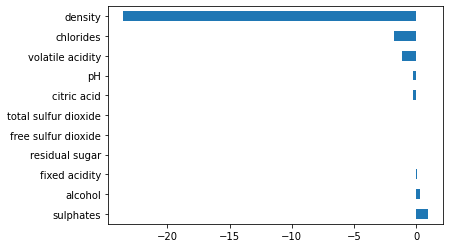

In [9]:
%matplotlib inline
feat_importances = pd.Series(reg.coef_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

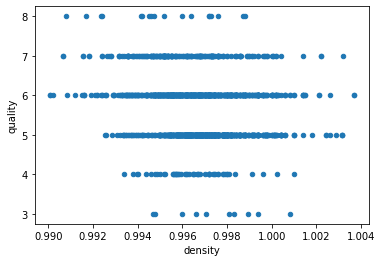

In [10]:
data.plot.scatter(x='density',y='quality')


In [11]:
#4.5 data cleaning/wrangling
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

In [12]:
reg = LinearRegression()
reg.fit(X_train_std, y_train)

LinearRegression()

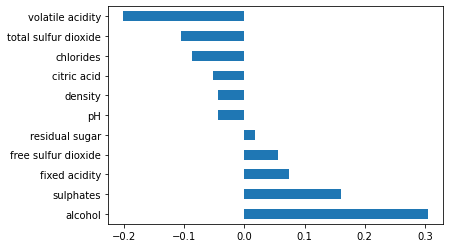

In [13]:
%matplotlib inline
feat_importances = pd.Series(reg.coef_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [15]:
#don't forget to do preprocessing to test data before evaluation 
X_test_std = scaler.transform(X_test)
pred = reg.predict(X_test_std)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.3026000269960406
0.45001367789267216
